# Instacart Market Basket Analysis

Valentino Fredrick Albert Mamesah (1305223104)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SEGMENT 1: EKSPLORASI DATA

In [2]:
orders_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/orders.csv'
products_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/products.csv'
aisles_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/aisles.csv'
departments_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/departments.csv'
order_products_prior_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/order_products__prior.csv'
order_products_train_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/order_products__train.csv'

orders = pd.read_csv(orders_path,
                     dtype={
                        'order_id': 'int32',
                        'user_id': 'int32',
                        'order_number': 'int16',
                        'order_dow': 'int8',
                        'order_hour_of_day': 'int8',
                        'days_since_prior_order': 'float32'
                     },
                     usecols=['order_id','user_id','eval_set','order_number','order_dow','order_hour_of_day','days_since_prior_order'])

products = pd.read_csv(products_path,
                       dtype={
                           'product_id': 'int32',
                           'aisle_id': 'int16',
                           'department_id': 'int16'
                       },
                       usecols=['product_id','product_name','aisle_id','department_id'])

aisles = pd.read_csv(aisles_path,
                     dtype={'aisle_id': 'int16'},
                     usecols=['aisle_id','aisle'])

departments = pd.read_csv(departments_path,
                          dtype={'department_id': 'int16'},
                          usecols=['department_id','department'])

order_products_prior = pd.read_csv(order_products_prior_path,
                                   dtype={
                                       'order_id': 'int32',
                                       'product_id': 'int32',
                                       'add_to_cart_order': 'int16',
                                       'reordered': 'int8'
                                   },
                                   usecols=['order_id','product_id','add_to_cart_order','reordered'])

order_products_train = pd.read_csv(order_products_train_path,
                                   dtype={
                                       'order_id': 'int32',
                                       'product_id': 'int32',
                                       'add_to_cart_order': 'int16',
                                       'reordered': 'int8'
                                   },
                                   usecols=['order_id','product_id','add_to_cart_order','reordered'])

print(orders.head())
print(products.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni

In [4]:
# 2. Melihat struktur data
print("=== Struktur Data ===")
print("orders:", orders.shape)
print("products:", products.shape)
print("aisles:", aisles.shape)
print("departments:", departments.shape)
print("order_products__prior:", order_products_prior.shape)
print("order_products__train:", order_products_train.shape)

# Info dan statistik deskriptif untuk orders & products
print("\n--- Info orders ---")
print(orders.info())
print("\n--- Statistik Deskriptif orders ---")
print(orders.describe())

print("\n--- Info products ---")
print(products.info())
print("\n--- Statistik Deskriptif products ---")
print(products.describe())

=== Struktur Data ===
orders: (3421083, 7)
products: (49688, 4)
aisles: (134, 2)
departments: (21, 2)
order_products__prior: (32434489, 4)
order_products__train: (1384617, 4)

--- Info orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int16  
 4   order_dow               int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float32
dtypes: float32(1), int16(1), int32(2), int8(2), object(1)
memory usage: 78.3+ MB
None

--- Statistik Deskriptif orders ---
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773

<ipython-input-5-e059c3bc7ee0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders, x='order_dow', palette='Set2')


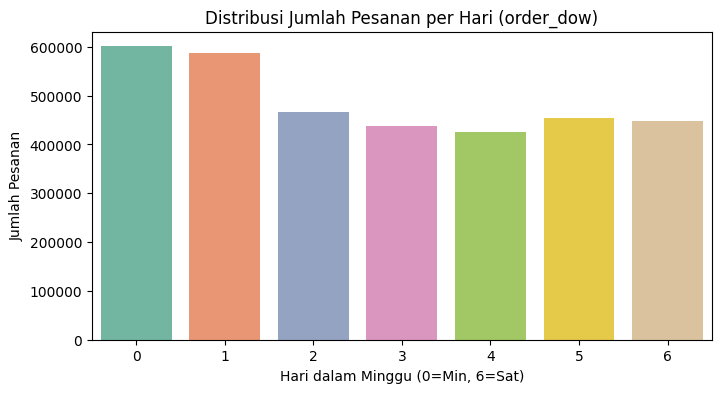

<ipython-input-5-e059c3bc7ee0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='count', y='product_name', palette='viridis')


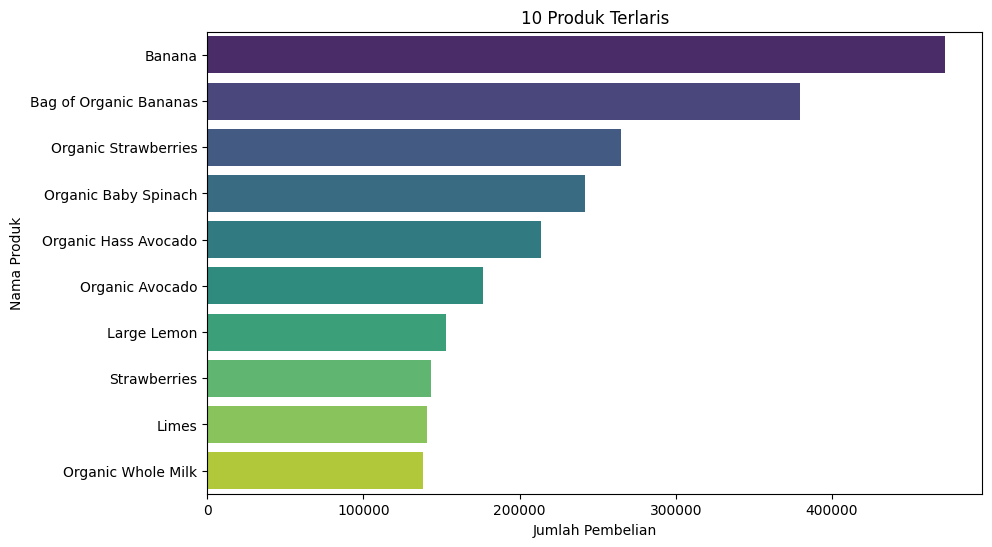

<ipython-input-5-e059c3bc7ee0>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_counts, x='department', y='count', palette='magma')


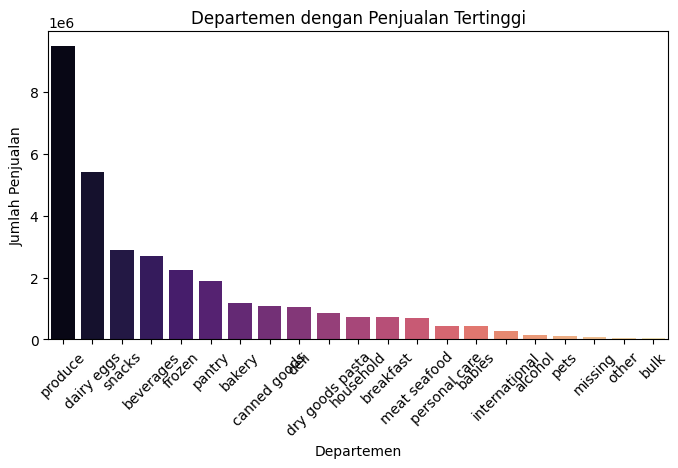


Reorder Rate (Rata-rata) pada order_products__prior: 0.5896974667922161


<ipython-input-5-e059c3bc7ee0>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_products_prior, x='reordered', palette='coolwarm')


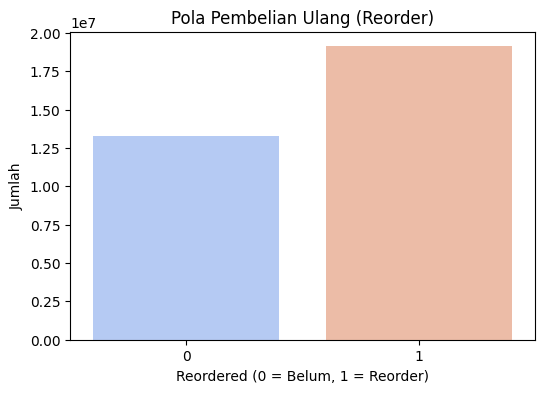

In [5]:
# 3. Visualisasi Data

## a. Distribusi jumlah pesanan per hari (order_dow)
plt.figure(figsize=(8,4))
sns.countplot(data=orders, x='order_dow', palette='Set2')
plt.title('Distribusi Jumlah Pesanan per Hari (order_dow)')
plt.xlabel('Hari dalam Minggu (0=Min, 6=Sat)')
plt.ylabel('Jumlah Pesanan')
plt.show()

## b. Produk Terlaris
# Hitung frekuensi tiap produk muncul di order_products__prior
top_products = order_products_prior['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'count']

top_products = pd.merge(top_products, products[['product_id', 'product_name']], on='product_id', how='left')
top_products = top_products.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='count', y='product_name', palette='viridis')
plt.title('10 Produk Terlaris')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Produk')
plt.show()

## c. Departemen dengan Penjualan Tertinggi
# Gabungkan order_products__prior dengan products dan departments
dept_sales = pd.merge(order_products_prior, products, on='product_id', how='left')
dept_sales = pd.merge(dept_sales, departments, on='department_id', how='left')
dept_counts = dept_sales['department'].value_counts().reset_index()
dept_counts.columns = ['department', 'count']

plt.figure(figsize=(8,4))
sns.barplot(data=dept_counts, x='department', y='count', palette='magma')
plt.title('Departemen dengan Penjualan Tertinggi')
plt.xlabel('Departemen')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.show()

## d. Pola Pembelian Ulang (Reorder)
# Rata-rata nilai kolom 'reordered' dari order_products__prior
reorder_rate = order_products_prior['reordered'].mean()
print("\nReorder Rate (Rata-rata) pada order_products__prior:", reorder_rate)

plt.figure(figsize=(6,4))
sns.countplot(data=order_products_prior, x='reordered', palette='coolwarm')
plt.title('Pola Pembelian Ulang (Reorder)')
plt.xlabel('Reordered (0 = Belum, 1 = Reorder)')
plt.ylabel('Jumlah')
plt.show()

# SEGMENT 2: DATA PREPARATION

In [4]:
# 1. Menangani missing values
# Pada orders, kolom days_since_prior_order memiliki missing value
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

# 2. Menggabungkan tabel-tabel yang relevan
orders_prior_merged = pd.merge(order_products_prior, orders, on='order_id', how='left')
orders_prior_merged = pd.merge(orders_prior_merged, products, on='product_id', how='left')
orders_prior_merged = pd.merge(orders_prior_merged, aisles, on='aisle_id', how='left')
orders_prior_merged = pd.merge(orders_prior_merged, departments, on='department_id', how='left')

orders_train_merged = pd.merge(order_products_train, orders, on='order_id', how='left')
orders_train_merged = pd.merge(orders_train_merged, products, on='product_id', how='left')
orders_train_merged = pd.merge(orders_train_merged, aisles, on='aisle_id', how='left')
orders_train_merged = pd.merge(orders_train_merged, departments, on='department_id', how='left')

orders_prior_merged.to_csv('/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/orders_prior_merged.csv', index=False)
orders_train_merged.to_csv('/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/orders_train_merged.csv', index=False)

print("Hasil merge telah disimpan sebagai CSV.")

Hasil merge telah disimpan sebagai CSV.


In [5]:
# 3. Feature Engineering

## a. Frekuensi pembelian produk oleh pelanggan
user_product_freq = orders_prior_merged.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
user_product_freq.columns = ['user_id', 'product_id', 'purchase_frequency']

## b. Waktu terakhir pembelian produk oleh pelanggan
last_purchase = orders_prior_merged.groupby(['user_id', 'product_id'])['order_number'].max().reset_index()
last_purchase.columns = ['user_id', 'product_id', 'last_order_number']

## c. Rasio pembelian ulang (reorder ratio) untuk tiap produk (dari data prior)
product_reorder = orders_prior_merged.groupby('product_id')['reordered'].mean().reset_index()
product_reorder.columns = ['product_id', 'reorder_ratio']

# Gabungkan fitur-fitur baru ke orders_train_merged
orders_train_merged = pd.merge(orders_train_merged, user_product_freq, on=['user_id', 'product_id'], how='left')
orders_train_merged = pd.merge(orders_train_merged, last_purchase, on=['user_id', 'product_id'], how='left')
orders_train_merged = pd.merge(orders_train_merged, product_reorder, on='product_id', how='left')

# Tangani missing values akibat merge (misalnya, jika tidak ada record pada data prior)
orders_train_merged['purchase_frequency'].fillna(0, inplace=True)
orders_train_merged['last_order_number'].fillna(0, inplace=True)
orders_train_merged['reorder_ratio'].fillna(0, inplace=True)

# 4. Encoding data kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
orders_train_merged['eval_set_enc'] = le.fit_transform(orders_train_merged['eval_set'])

print("\nData setelah Data Preparation:")
print(orders_train_merged.head())

output_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/orders_train_merged_features.csv'
orders_train_merged.to_csv(output_path, index=False)
print(f"\nData telah disimpan ke: {output_path}")

<ipython-input-5-23857c9231d9>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_train_merged['purchase_frequency'].fillna(0, inplace=True)
<ipython-input-5-23857c9231d9>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace


Data setelah Data Preparation:
   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1         1       11109                  2          1   112108    train   
2         1       10246                  3          0   112108    train   
3         1       49683                  4          0   112108    train   
4         1       43633                  5          1   112108    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             4          4                 10                     9.0   
1             4          4                 10                     9.0   
2             4          4                 10                     9.0   
3             4          4                 10                     9.0   
4             4          4                 10                     9.0   

                                    product_name  aisle_id  department_id  \
0





---



In [1]:
! gdown --id 1NKCueyyhPh8eDUMF7afIqD9wFyuKMdqb

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1NKCueyyhPh8eDUMF7afIqD9wFyuKMdqb
From (redirected): https://drive.google.com/uc?id=1NKCueyyhPh8eDUMF7afIqD9wFyuKMdqb&confirm=t&uuid=0631cd7a-f669-4687-9fb3-dee25104513b
To: /content/orders_prior_merged.csv
100% 3.19G/3.19G [00:31<00:00, 100MB/s] 


In [3]:
!pip install mlxtend --quiet

# SEGMENT 3: MODELING

=== Info orders_train_merged ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   user_id                 1384617 non-null  int64  
 5   eval_set                1384617 non-null  object 
 6   order_number            1384617 non-null  int64  
 7   order_dow               1384617 non-null  int64  
 8   order_hour_of_day       1384617 non-null  int64  
 9   days_since_prior_order  1384617 non-null  float64
 10  product_name            1384617 non-null  object 
 11  aisle_id                1384617 non-null  int64  
 12  department_id           1384617 non-null  int64  
 13  aisle                   

<ipython-input-5-401dd2b188ba>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_train_merged['reordered'].fillna(0, inplace=True)



=== EVALUASI MODEL ===
F1-Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111266
           1       1.00      1.00      1.00    165658

    accuracy                           1.00    276924
   macro avg       1.00      1.00      1.00    276924
weighted avg       1.00      1.00      1.00    276924



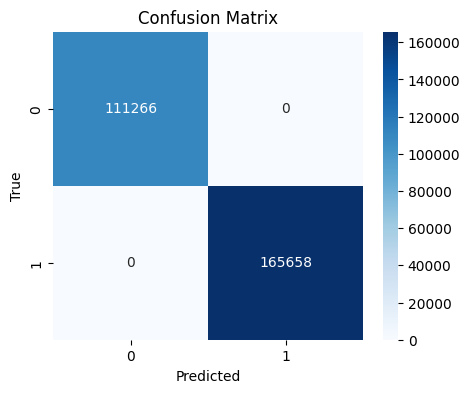


=== Feature Importances ===
                  feature  importance
5       last_order_number    0.538359
4      purchase_frequency    0.434927
6           reorder_ratio    0.012672
2  days_since_prior_order    0.009620
3       add_to_cart_order    0.004327
1       order_hour_of_day    0.000075
0               order_dow    0.000020
7            eval_set_enc    0.000000


<ipython-input-5-401dd2b188ba>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi, palette='viridis')


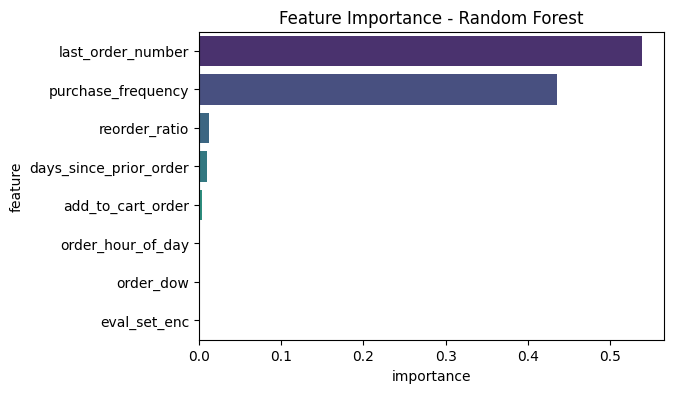


Selesai. Model siap digunakan untuk prediksi.


In [5]:
# Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# 1. Membaca Data
orders_train_merged_path = '/content/drive/MyDrive/Dataset TCCBDA/Instacart Market Basket Analysis/orders_train_merged.csv'
orders_train_merged = pd.read_csv(orders_train_merged_path)

# 2. Cek Struktur Data
print("=== Info orders_train_merged ===")
print(orders_train_merged.info())
print("\n=== Beberapa Baris Pertama ===")
print(orders_train_merged.head())

# 3. Tangani (Jika Ada) Missing Values di Kolom Target
orders_train_merged['reordered'].fillna(0, inplace=True)

# 4. Trget
y = orders_train_merged['reordered']

features = [
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'add_to_cart_order',
    'purchase_frequency',
    'last_order_number',
    'reorder_ratio',
    'eval_set_enc'
]

X = orders_train_merged[features].copy()

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n=== Ukuran Data ===")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# 6. Bangun Model (Contoh: Random Forest)
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# 7. Evaluasi Model
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("\n=== EVALUASI MODEL ===")
print("F1-Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 9. Analisis Feature Importance
importances = model.feature_importances_
fi = pd.DataFrame({'feature': features, 'importance': importances})
fi.sort_values('importance', ascending=False, inplace=True)

print("\n=== Feature Importances ===")
print(fi)

plt.figure(figsize=(6,4))
sns.barplot(x='importance', y='feature', data=fi, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()

print("\nSelesai. Model siap digunakan untuk prediksi.")

In [10]:
!pip install mlxtend --quiet

In [11]:
# B. Association Rule Mining

# 1. Sampling order_id (misalnya 10% dari total)
unique_orders = orders_train_merged['order_id'].unique()
sample_size = int(0.1 * len(unique_orders))  # Ambil 10% dari total order
sample_orders = np.random.choice(unique_orders, size=sample_size, replace=False)

df_sample = orders_train_merged[orders_train_merged['order_id'].isin(sample_orders)].copy()

# 2. Filter top products (misalnya top 200 produk terlaris)
product_counts = df_sample['product_id'].value_counts()
top_n = 200  # Atur sesuai keperluan
top_products = product_counts.head(top_n).index

df_filtered = df_sample[df_sample['product_id'].isin(top_products)]

print(f"Total orders setelah sampling: {df_sample['order_id'].nunique()}")
print(f"Total produk setelah filter top {top_n}: {len(top_products)}")

# 3. Bentuk matriks transaksi: baris = order_id, kolom = product_id
basket = (
    df_filtered
    .groupby(['order_id','product_id'])['add_to_cart_order']
    .count()
    .unstack()
    .fillna(0)
)

# 4. Ubah nilai > 0 menjadi 1 (indikasi pembelian)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# 5. Jalankan apriori
from mlxtend.frequent_patterns import apriori, association_rules

# Misal minimum support 1% (0.01) - silakan sesuaikan dengan dataset Anda
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print("Jumlah Frequent Itemsets:", frequent_itemsets.shape[0])

# 6. Buat association rules dengan metric "confidence"
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print("Jumlah Association Rules:", rules.shape[0])

print("\n=== Contoh Association Rules (head) ===")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))


=== ASSOCIATION RULE MINING dengan Sampling & Filter Produk ===
Total orders setelah sampling: 13120
Total produk setelah filter top 200: 200


<ipython-input-11-653e214031d0>:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Jumlah Frequent Itemsets: 177
Jumlah Association Rules: 9

=== Contoh Association Rules (head) ===
  antecedents consequents   support  confidence      lift
0      (4920)     (24852)  0.012836    0.312354  1.644310
1     (19057)     (13176)  0.010058    0.346535  2.304124
2     (27966)     (13176)  0.017051    0.326606  2.171615
3     (47209)     (13176)  0.022799    0.330556  2.197879
4     (27966)     (21137)  0.016285    0.311927  2.858825
5     (28204)     (24852)  0.012932    0.420561  2.213935
6     (45066)     (24852)  0.011974    0.360231  1.896342
7     (47766)     (24852)  0.022224    0.307285  1.617623
8     (31717)     (26209)  0.011687    0.348571  5.632720
